In [9]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [10]:
#Load data
df = pd.read_csv('forestfires.csv')
df.drop(columns=['month','day'], inplace=True)
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [11]:
#describe the data
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.duplicated().sum()

8

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Scatterplot FFMC v/s DMC')

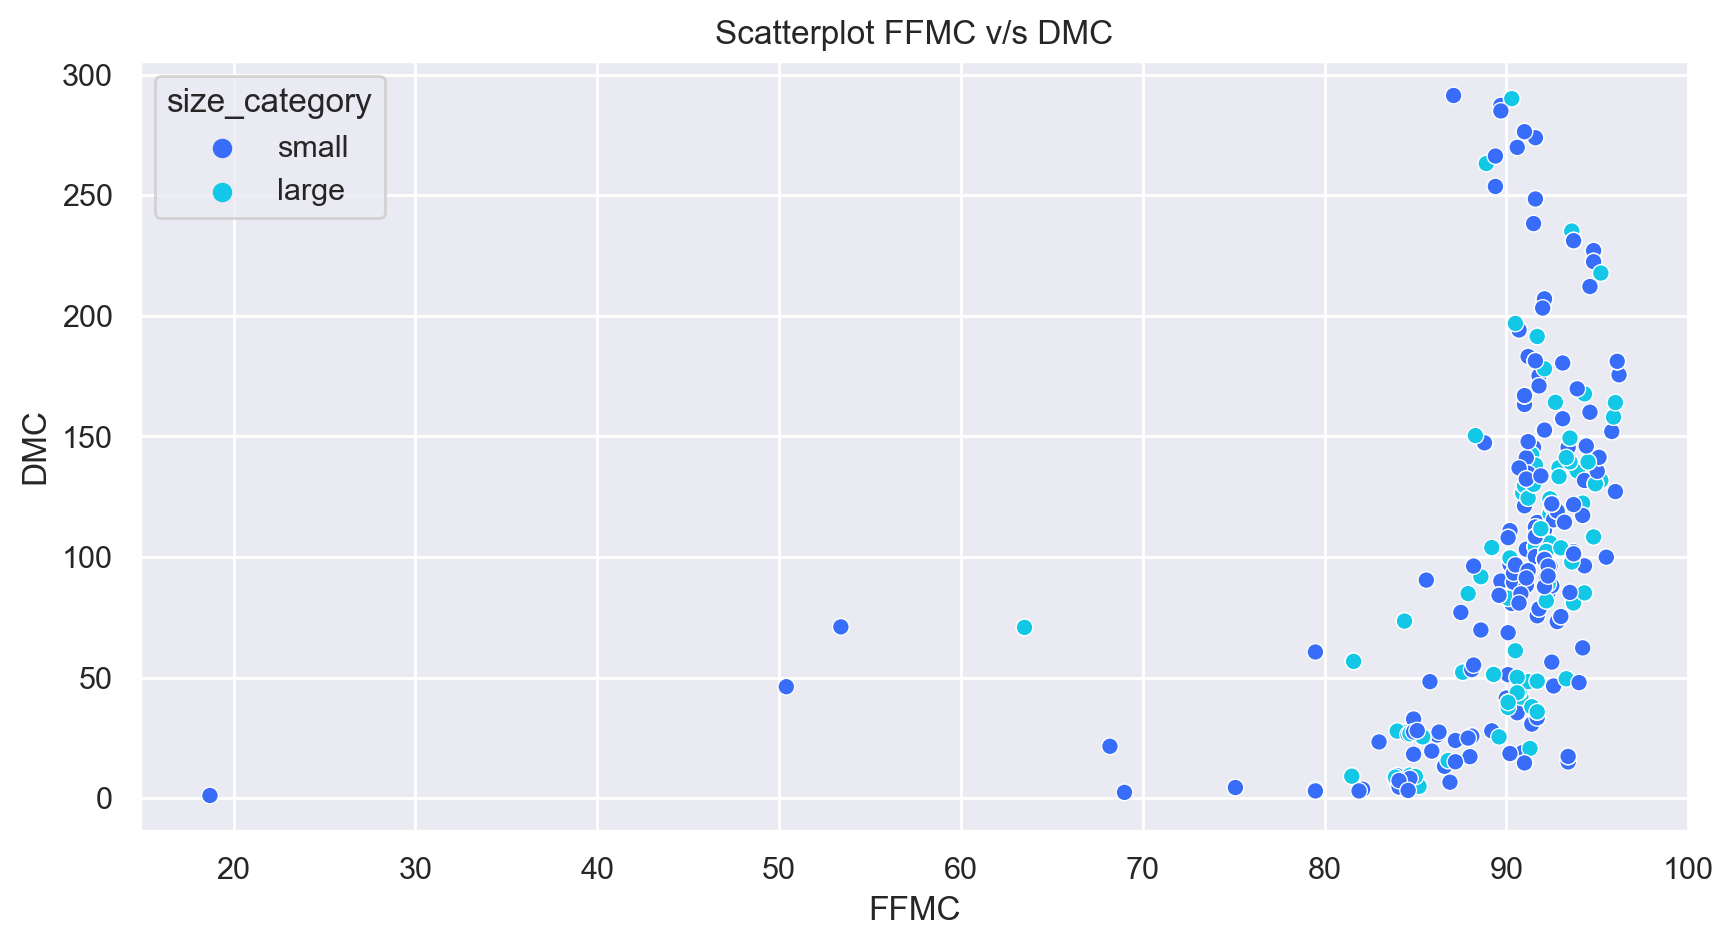

In [15]:
#Scatterplot between FFMC v/s DMC
sns.scatterplot(x='FFMC', y='DMC', data=df, hue='size_category')
plt.title('Scatterplot FFMC v/s DMC')

<AxesSubplot:xlabel='DC', ylabel='Count'>

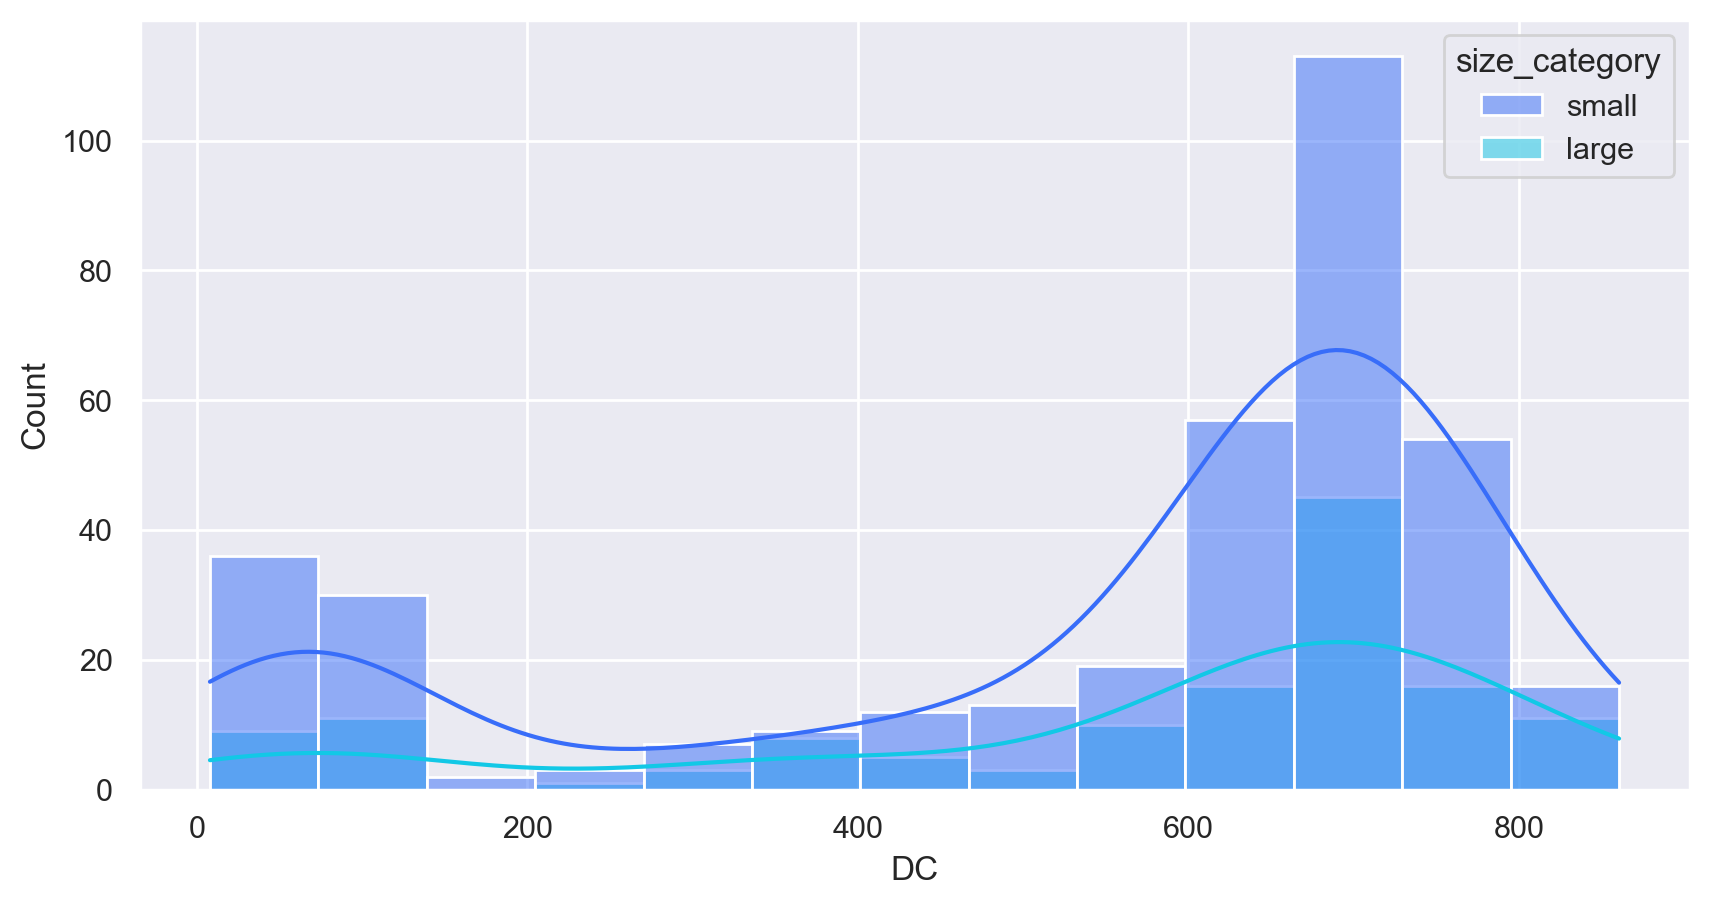

In [16]:
sns.histplot(x="DC", data=df, kde=True, hue='size_category',color='red')

<AxesSubplot:>

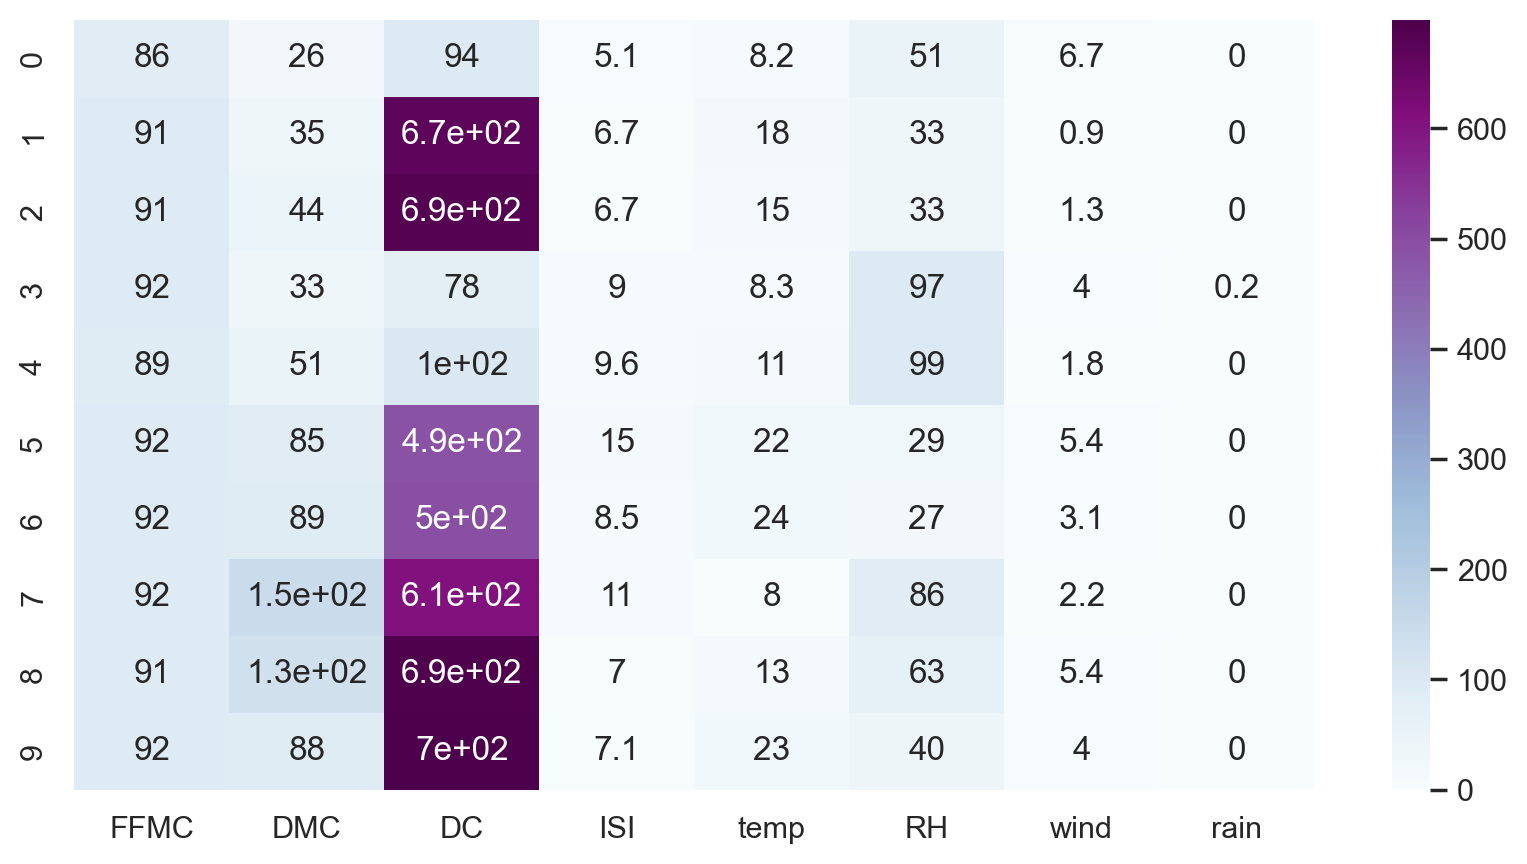

In [17]:
#Plotting heatmap for only 10 rows and 8 columns in df
sns.heatmap(data=df.iloc[:10,:8],cmap='BuPu',annot=True)

<AxesSubplot:ylabel='None'>

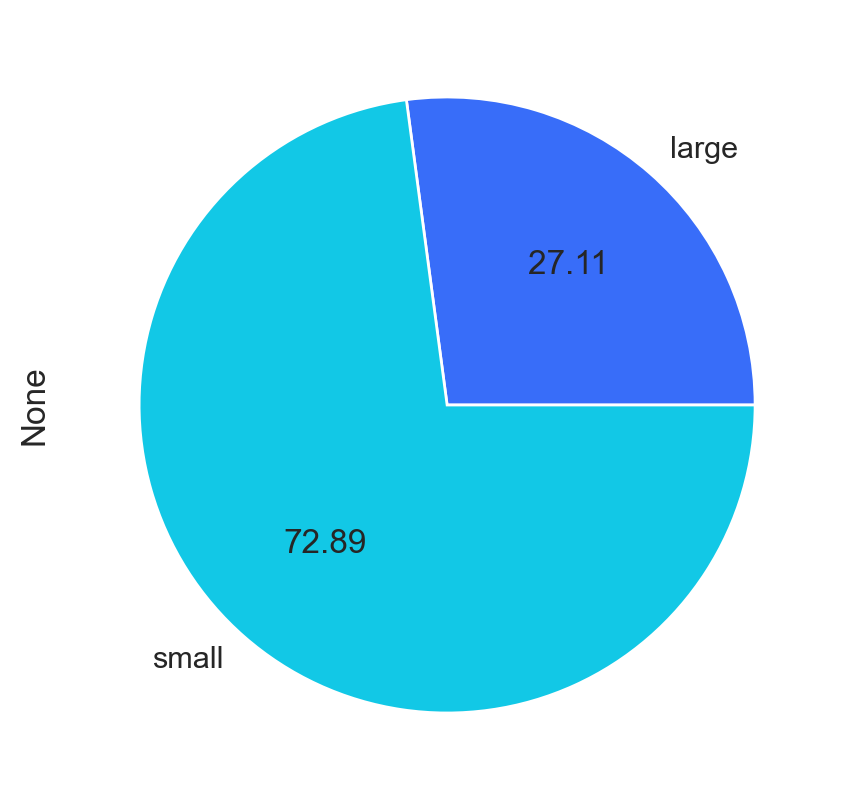

In [18]:
df.groupby('size_category').size().plot(kind='pie',autopct='%.2f')

In [19]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['size_category'] = lb.fit_transform(df['size_category'])
df.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [20]:
x = df.iloc[:,:-1]
y = df['size_category']


In [21]:
sta_scaler = StandardScaler()
x = sta_scaler.fit_transform(x)
x

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [22]:
#Splitting data into training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [23]:
#Model building using rbf. we have 4 kernels: poly,linear,rbf,sigmoid

svc = SVC(kernel='rbf')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

In [24]:
#Accuracy of after training and testing
svc.score(xtrain,ytrain), svc.score(xtest,ytest)

(0.7813267813267813, 0.7843137254901961)

The above accuracy scores shows that the model created by us is a generalized model. But the accuracy is less so we are moving into hyperparameter tuning to get correct paramater.

# Hyperparamater tuning

In [25]:
params = { 'kernel': ['poly','linear','rbf'],
           'C': [0.1,0.001,0.00011,1,10],
           'gamma' : [0.1,0.001,1,10]
         }

In [26]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1)

In [27]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.00011, 1, 10],
                         'gamma': [0.1, 0.001, 1, 10],
                         'kernel': ['poly', 'linear', 'rbf']},
             verbose=1)

In [28]:
#Getting best parameters

grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

Using best_params_ we have got kernel='linear',C = 10, gamma=0.1. We are using these parameter to build the model

In [29]:
svm = SVC(kernel='linear',C = 10, gamma=0.1)

In [30]:
# Model building
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [31]:
svm.score(xtrain,ytrain), svm.score(xtest,ytest)

(0.9877149877149877, 0.9607843137254902)

The above model is regularized model. We have got very good accuracy